## Exploratory Data Analysis

This file showcases the basic elements of EDA on simple examples.

The major steps of the DS lifecycle are:

- Obtain
- Scrub (Clean)
- Explore (EDA)
- Model
- Interpret (Deploy)

Here will be covered first 3 of them.

### Statistics: basics

In [3]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

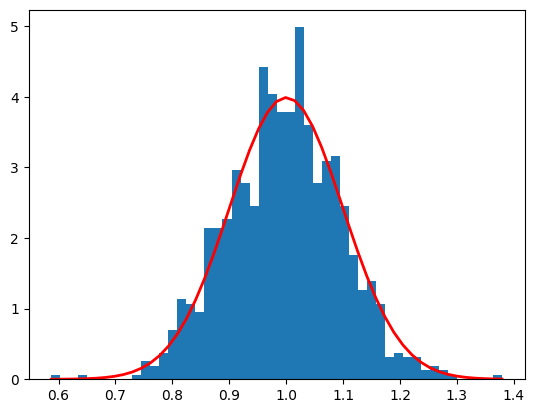

In [2]:
# Random variable, normal distribution
# x = meat consumption from Silpo over the last 1000 days
# y = probability that x meat amount will be bought on a given day

mu, sigma = 1, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

prob, bins, ignored = plt.hist(s, 50, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')
plt.show()

In [3]:
len(s)

1000

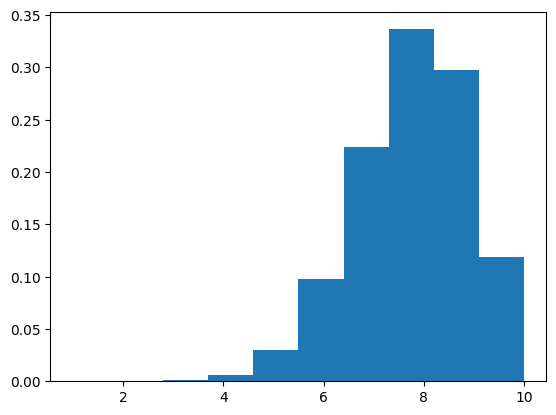

In [4]:
# Random variable, binomial distribiution
# x = number of times we throw heads in 10 coin flips
# y = probability to see x heads

n, p = 10, 0.8 # number of flips, probability of each result in a flip
s = np.random.binomial(n, p, 1000000) # 1000 trials

probs, bins, ignored = plt.hist(s, n, density=True)
plt.show()

In [5]:
prob

array([0.06308452, 0.        , 0.        , 0.06308452, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06308452,
       0.25233806, 0.18925355, 0.3785071 , 0.69392968, 1.13552129,
       1.07243677, 0.94626774, 2.14487354, 2.14487354, 2.27104257,
       2.96497225, 2.7757187 , 2.46029612, 4.41591611, 4.03740902,
       3.78507096, 3.78507096, 4.98367676, 3.59581741, 2.7757187 ,
       3.09114128, 3.1542258 , 2.46029612, 1.76636645, 1.26169032,
       1.38785935, 1.07243677, 0.31542258, 0.3785071 , 0.31542258,
       0.31542258, 0.12616903, 0.18925355, 0.12616903, 0.06308452,
       0.        , 0.        , 0.        , 0.        , 0.06308452])

In [6]:
# expected value
sum([(i*prob[i]) for i in range(n)])

np.float64(0.757014191084659)

In [7]:
s.mean()

np.float64(7.997368)

In [8]:
np.median(s)

np.float64(8.0)

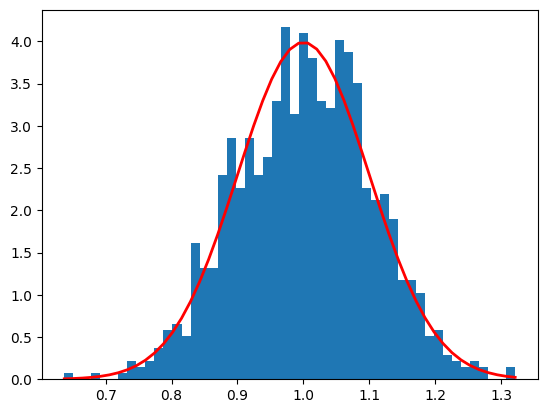

In [9]:
# Random variable, normal distribution - in more detail

# x = meat consumption from Silpo over the last 1000 days
# y = probability that x meat amount will be bought on a given day

mu, sigma = 1, 0.1 # mean and standard deviation
x = np.random.normal(mu, sigma, 1000)

prob, bins, ignored = plt.hist(x, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')
plt.show()

Probability density formula of **normal (Gaussian) distribution**:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2}
$$

In [10]:
from scipy.stats import norm

probability_pdf = norm.pdf(0.85, loc=mu, scale=sigma)
print(probability_pdf)

1.2951759566589167


In [11]:
# average (mean)
x.mean()

np.float64(1.0020731417464281)

In [12]:
# variance
np.sum(((x - x.mean())**2)/len(x))

np.float64(0.01041998342657651)

In [13]:
# standard deviation
np.sqrt(np.sum(((x - x.mean())**2)/len(x)))

np.float64(0.10207832006149253)

In [14]:
# standard deviation
np.std(x)

np.float64(0.10207832006149253)

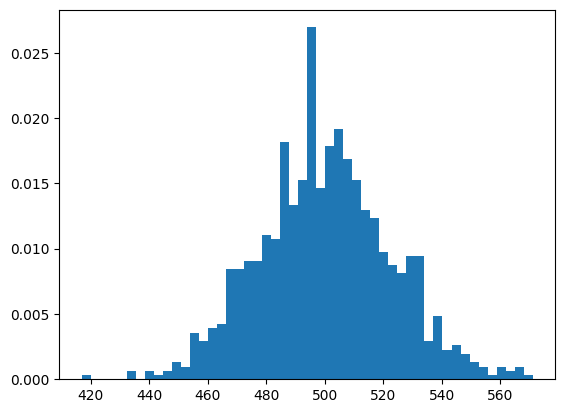

In [15]:
# new variable: z = number of active coupons for discount on meat
# Poisson distribution is a discrete distribution that counts the frequency
# of occurrences as integers, whose list {0, 1, 2, ...} can be infinitive
z = np.random.poisson(500, 1000)
prob, bins, ignored = plt.hist(z, 50, density=True)
plt.show()

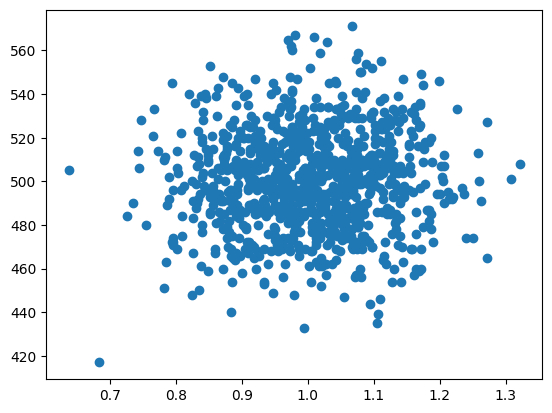

In [16]:
plt.scatter(x, z)

In [17]:
np.cov(x, z)[0][1]
# Note that element C0_1, which shows the covariance between x and z, is negative.

np.float64(0.061657758677955414)

In [18]:
np.std(x)

np.float64(0.10207832006149253)

In [19]:
np.std(z)

np.float64(22.532906581264655)

In [20]:
np.corrcoef(x, z) # [0][1]

array([[1.       , 0.0267795],
       [0.0267795, 1.       ]])

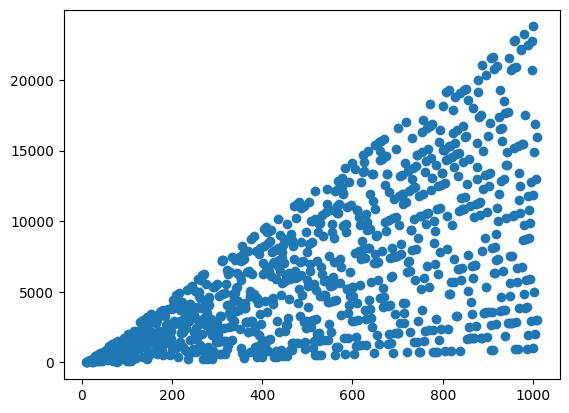

In [21]:
u = np.arange(10, 1010)
j = np.arange(0, 1000)*np.random.randint(1, 25, size=(1000))
plt.scatter(u, j)

In [22]:
np.cov(u, j)[0][1]

np.float64(993186.8803803803)

In [23]:
np.corrcoef(u, j)[0][1]

np.float64(0.6445440100137336)

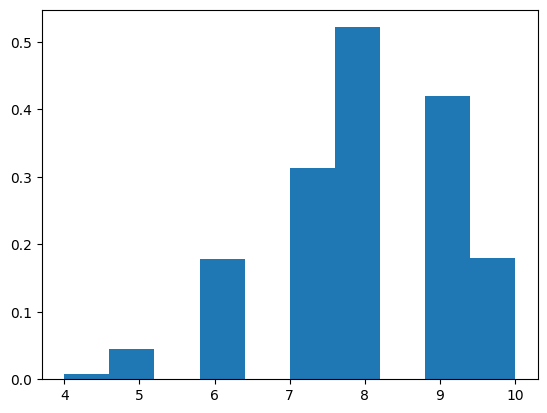

In [24]:
# Central limit theorem

N = 100000000
n = 1000
s = np.random.binomial(10, 0.8, N)
s = s.reshape((N//n, n))

prob, bins, ignored = plt.hist(s[0], 10, density=True)
plt.show()

In [25]:
len(s)

100000

In [26]:
s_means = s.mean(axis=1)
s_means

array([7.965, 8.006, 8.072, ..., 8.039, 7.98 , 8.013])

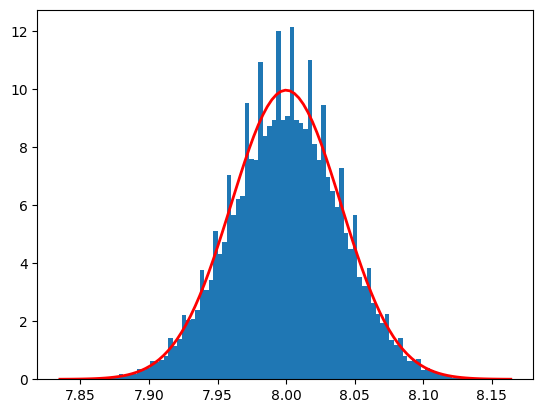

In [27]:
sigma = s_means.std()
mu = s_means.mean()

prob, bins, ignored = plt.hist(s_means, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')
plt.show()

### Pandas
`# intro`

In [28]:
import pandas as pd

mountain_height = pd.Series([2061, 2035.8, 2028.5, 2022.5, 2016.4])

print(mountain_height)

0    2061.0
1    2035.8
2    2028.5
3    2022.5
4    2016.4
dtype: float64


In [29]:
mountains_height = pd.Series(
    data=[2061, 2035.8, 2028.5, 2022.5, 2016.4],
    index=["Goverla", "Brebenskyl", "Pip_Ivan", "Petros", "Gutin_Tomnatik"],
    name="Height, m",
    dtype=float,
)

print(mountains_height)

Goverla           2061.0
Brebenskyl        2035.8
Pip_Ivan          2028.5
Petros            2022.5
Gutin_Tomnatik    2016.4
Name: Height, m, dtype: float64


In [30]:
print(mountains_height.iloc[0]) # 2061.0
print(mountains_height["Goverla"]) # 2061.0
print(mountains_height[["Pip_Ivan", "Goverla", "Gutin_Tomnatik"]])

2061.0
2061.0
Pip_Ivan          2028.5
Goverla           2061.0
Gutin_Tomnatik    2016.4
Name: Height, m, dtype: float64


In [31]:
print(mountains_height[1:3])
print(mountains_height["Brebenskyl":"Petros"])

Brebenskyl    2035.8
Pip_Ivan      2028.5
Name: Height, m, dtype: float64
Brebenskyl    2035.8
Pip_Ivan      2028.5
Petros        2022.5
Name: Height, m, dtype: float64


In [32]:
print(mountains_height.Petros) # 2022.5
print(mountains_height.Brebenskyl) # 2035.8

2022.5
2035.8


In [33]:
print(mountains_height > 2030)
print(mountains_height[mountains_height > 2030])

Goverla            True
Brebenskyl         True
Pip_Ivan          False
Petros            False
Gutin_Tomnatik    False
Name: Height, m, dtype: bool
Goverla       2061.0
Brebenskyl    2035.8
Name: Height, m, dtype: float64


In [34]:
print("Goverla" in mountains_height) # True

True


In [35]:
sort_index = mountains_height.sort_index()
print(sort_index)

Brebenskyl        2035.8
Goverla           2061.0
Gutin_Tomnatik    2016.4
Petros            2022.5
Pip_Ivan          2028.5
Name: Height, m, dtype: float64


In [36]:
mountains_height.sort_values(inplace=True, ascending=False)
mountains_height

Goverla           2061.0
Brebenskyl        2035.8
Pip_Ivan          2028.5
Petros            2022.5
Gutin_Tomnatik    2016.4
Name: Height, m, dtype: float64

In [37]:
mountains_height = pd.Series(
    {"Goverla": 2061, "Brebenskyl": 2035.8, "Pip_Ivan": 2028.5},
    index=["Goverla", "Brebenskyl", "Pip_Ivan", "Petros", "Gutin_Tomnatik"],
    name="Height, m",
    dtype=float,
)

print(mountains_height)
print("")

# mountains_height.fillna(0, inplace=True)
print(mountains_height)

Goverla           2061.0
Brebenskyl        2035.8
Pip_Ivan          2028.5
Petros               NaN
Gutin_Tomnatik       NaN
Name: Height, m, dtype: float64

Goverla           2061.0
Brebenskyl        2035.8
Pip_Ivan          2028.5
Petros               NaN
Gutin_Tomnatik       NaN
Name: Height, m, dtype: float64


In [38]:
mountains_height = mountains_height.reset_index(drop=False)

In [39]:
mountains_height

,index,"Height, m"
0,Goverla,2061.0
1,Brebenskyl,2035.8
2,Pip_Ivan,2028.5
3,Petros,NaN
4,Gutin_Tomnatik,NaN


In [40]:
mountains_height.columns = ["Mountain", "Height, m"]
mountains_height

,Mountain,"Height, m"
0,Goverla,2061.0
1,Brebenskyl,2035.8
2,Pip_Ivan,2028.5
3,Petros,NaN
4,Gutin_Tomnatik,NaN


In [41]:
type(mountains_height)

pandas.core.frame.DataFrame

In [42]:
mountains_height.iloc[0]

Mountain     Goverla
Height, m     2061.0
Name: 0, dtype: object

In [43]:
mountains_height.iloc[0, 0]

'Goverla'

In [44]:
mountains_height.loc[0, "Mountain"]

'Goverla'

In [45]:
mountains_height[mountains_height["Height, m"] > 2030]

,Mountain,"Height, m"
0,Goverla,2061.0
1,Brebenskyl,2035.8


In [46]:
mountains_height["Goverla" == mountains_height["Mountain"]]

,Mountain,"Height, m"
0,Goverla,2061.0


In [47]:
# mountains_height.to_csv("mountains_height.csv", index=True)

In [52]:
# mountains_height.to_excel("mountains_height.xlsx", sheet_name="Mounts")
#TODO: check the env. openpyxl should be installed somewhere

### JSON

In [53]:
data = {
    "columns": ["name", "country"],
    "index": [1, 2, 3],
    "data": [
        ["Michael", "Canada"],
        ["John", "USA"],
        ["Liza", "Australia"]
    ]
}

In [55]:
df_d = pd.DataFrame(data["data"], columns=data["columns"], index=data["index"])
df_d

,name,country
1,Michael,Canada
2,John,USA
3,Liza,Australia


In [ ]:
# df_d.to_json("names_countries.json", orient="split")

In [59]:
employees = pd.read_json("names_countries.json", orient="split")
employees

,name,country
1,Michael,Canada
2,John,USA
3,Liza,Australia


In [61]:
data = {
    "name": ["Michael", "John", "Liza"],
    "country": ["Canada", "USA", "Australia"]
}

In [62]:
df_j = pd.DataFrame.from_dict(data)
df_j

,name,country
0,Michael,Canada
1,John,USA
2,Liza,Australia


In [63]:
import os
import json

PATH = "../../data"

with open(os.path.join(PATH, "employees.json"), "w") as file:
    json.dump(data, file)

In [64]:
pd.read_json(os.path.join(PATH, "employees.json"), orient=None)

,name,country
0,Michael,Canada
1,John,USA
2,Liza,Australia


In [ ]:
new_employee = pd.DataFrame.from_dict({"name": ["John"], "country": ["Denmark"]})
print(new_employee)
# df_j.append(new_employee, ignore_index=True)
new_df = pd.concat([df_j, new_employee])
new_df

In [ ]:
# new_df =
new_df.reset_index(drop=True)
new_df

### HTML

In [4]:
tmp = pd.read_html("https://statisticstimes.com/tech/top-computer-languages.php", attrs={"id": "table_id1"})
print(tmp[0].head())

   Mar 2025 Change Programming language    Share  Trends
0         1    NaN               Python  30.27 %  +1.8 %
1         2    NaN                 Java  14.89 %  -0.9 %
2         3    NaN           JavaScript   7.78 %  -0.9 %
3         4      ↑                C/C++   7.12 %  +0.6 %
4         5      ↓                   C#   6.11 %  -0.6 %


### CSV

We will use the Kaggle Titanic data to demonstrate these major steps.

- Data: https://www.kaggle.com/competitions/titanic/data
- Examples used to compose this notebook: https://www.kaggle.com/code/startupsci/titanic-data-science-solutions,
https://www.kaggle.com/code/abhishekmamidi/titanic-data-preprocessing-and-visualization/notebook
I

In [ ]:
# import data from Kaggle Titanic Competition
PATH = "../../data/titanic"
train_data = pd.read_csv(os.path.join(PATH, "train.csv"), index_col=0)
test_data = pd.read_csv(os.path.join(PATH, "test.csv"), index_col=0)

train_data.head(5)

What we can do in order to clean data:
- Remove duplicates
- Handle the NaN values (remove or impute)
- Transform categoric values into numeric values (e.g. one-hot-encoding, label encoding)
- Normalize data

#### Remove duplicates

In [ ]:
# Identify duplicates

len(train_data["Name"].unique()) == len(train_data)

In [ ]:
len(test_data["Name"].unique()) == len(test_data)

In [ ]:
# concatenate (manually create duplicates)
df_full = pd.concat([train_data.reset_index(drop=False), test_data.reset_index(drop=False)]).reset_index(drop=True)
len(df_full["Name"].unique()) == len(df_full)

In [ ]:
df_full[df_full["Name"].duplicated(keep=False)]

In [ ]:
df_full[df_full["Ticket"].duplicated(keep=False)].sort_values(by=["Ticket"])

In [ ]:
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
df_without_duplicates = df_full.drop_duplicates(keep="first")
len(df_without_duplicates)